# Participant ID:S04

### Content:
- Correlation matrix 
- Comfort Function implementation
- Weather Station Data (During Commuting)
- Weather Station Data (Day of Commuting from 8am to 6pm)
- Living Lab (Day of Commuting from 8am to 6pm)

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime


In [10]:
## Read the CSV file into a DataFrame
S04_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/process_data/S04_final_df.csv'

S04_df = pd.read_csv(S04_path, index_col=False, parse_dates=['DateTime'])

In [3]:
S04_df.columns

Index(['DateTime', 'ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn',
       'hrv_rmssd', 'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni',
       'hrv_entropy', 'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum',
       'eda_tonic_energy', 'eda_phasic_mean', 'eda_phasic_std',
       'eda_phasic_sum', 'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min',
       'acc_acc_z_min', 'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max',
       'acc_acc_z_max', 'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp',
       'acc_acc_z_ptp', 'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1',
       'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2', 'Dewpoint(C)_N2',
       'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4',
       'Dewpoint(C)_N4', 'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [4]:
# Set 'DateTime' column as the index
S04_df.set_index('DateTime', inplace=True)

# Group by the unique ID instances
grouped = S04_df.groupby('ID_instance')

# Prepare a list to store the results
results = []

# Iterate through each group
for name, group in grouped:
    # Sort the group by DateTime if not already sorted
    group = group.sort_index()
    
    # Calculate the duration
    start_time = group.index[0]
    end_time = group.index[-1]
    duration = end_time - start_time
    
    # Calculate the min, max, and avg for Temp(C)_N1 and RH(%)_N1
    temp_n1_min = group['Temp(C)_N1'].min()
    temp_n1_max = group['Temp(C)_N1'].max()
    temp_n1_avg = group['Temp(C)_N1'].mean()
    
    rh_n1_min = group['RH(%)_N1'].min()
    rh_n1_max = group['RH(%)_N1'].max()
    rh_n1_avg = group['RH(%)_N1'].mean()
    
    # Append the result to the list
    results.append([name, start_time, end_time, duration, 
                    temp_n1_min, temp_n1_max, temp_n1_avg, 
                    rh_n1_min, rh_n1_max, rh_n1_avg])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['ID_instance', 'Start Time', 'End Time', 'Duration', 
                                            'Min_Temp(C)_N1', 'Max_Temp(C)_N1', 'Avg_Temp(C)_N1',
                                            'Min_RH(%)_N1', 'Max_RH(%)_N1', 'Avg_RH(%)_N1'])

# Print the results as a table
print(results_df)

  ID_instance          Start Time            End Time        Duration  \
0       S04_1 2023-07-18 16:43:11 2023-07-18 16:48:21 0 days 00:05:10   
1       S04_2 2023-07-22 06:51:50 2023-07-22 07:22:07 0 days 00:30:17   
2       S04_3 2023-07-24 12:40:35 2023-07-24 12:51:03 0 days 00:10:28   
3       S04_4 2023-07-26 06:33:50 2023-07-26 06:45:09 0 days 00:11:19   
4       S04_5 2023-07-31 11:37:32 2023-07-31 11:49:54 0 days 00:12:22   

   Min_Temp(C)_N1  Max_Temp(C)_N1  Avg_Temp(C)_N1  Min_RH(%)_N1  Max_RH(%)_N1  \
0          42.902          43.143       43.043338          28.9          29.4   
1          24.921          25.184       25.034935          53.7          54.7   
2          39.376          40.452       39.968693          38.0          39.9   
3          18.121          18.189       18.151640          50.7          51.0   
4          18.189          18.189       18.189000          50.7          50.7   

   Avg_RH(%)_N1  
0     29.226367  
1     54.180968  
2     38.992369  
3 

In [5]:
# Group by 'id_instance' and calculate time duration
time_duration = S04_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S04_1     5.17
S04_2    30.28
S04_3    10.47
S04_4    11.32
S04_5    12.37
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_33772\1514817910.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S04_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [ ]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S04_df.drop(S04_df[S04_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [6]:
S04_df.isnull().sum()

ID_instance          4
hrv_vlf              0
hrv_lf               0
hrv_hf               0
hrv_sdnn             0
hrv_rmssd            0
hrv_mean_nni         0
hrv_median_nni       0
hrv_range_nni        0
hrv_entropy          0
eda_tonic_mean       0
eda_tonic_std        0
eda_tonic_sum        0
eda_tonic_energy     0
eda_phasic_mean      0
eda_phasic_std       0
eda_phasic_sum       0
eda_phasic_energy    0
acc_acc_x_min        0
acc_acc_y_min        0
acc_acc_z_min        0
acc_l2_min           0
acc_acc_x_max        0
acc_acc_y_max        0
acc_acc_z_max        0
acc_l2_max           0
acc_acc_x_ptp        0
acc_acc_y_ptp        0
acc_acc_z_ptp        0
acc_l2_ptp           0
Temp(C)_N1           0
RH(%)_N1             0
Dewpoint(C)_N1       0
Temp(C)_N2           0
RH(%)_N2             0
Dewpoint(C)_N2       0
Temp(C)_N3           0
RH(%)_N3             0
Dewpoint(C)_N3       0
Temp(C)_N4           0
RH(%)_N4             0
Dewpoint(C)_N4       0
Temp(C)_N5           0
RH(%)_N5   

In [7]:
S04_df.dropna(subset=['ID_instance'], inplace=True)

In [8]:
S04_df['ID_instance'].unique()

array(['S04_1', 'S04_2', 'S04_3', 'S04_4', 'S04_5'], dtype=object)

In [9]:
S04_df.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min', 'acc_acc_z_min',
       'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max', 'acc_acc_z_max',
       'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp', 'acc_acc_z_ptp',
       'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2',
       'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [10]:
# Drop columns starting with 'acc_'
S04_df = S04_df.filter(regex='^(?!acc_)')

In [11]:
S04_df.columns[1:18]

Index(['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd', 'hrv_mean_nni',
       'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy', 'eda_tonic_mean',
       'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy', 'eda_phasic_mean',
       'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy'],
      dtype='object')

In [12]:
S04_df.columns[18:30]

Index(['Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2',
       'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3',
       'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4'],
      dtype='object')

### Correlation matrix

In [13]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S04_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S04_df.columns[18:30] 

# Calculating correlation matrix
correlation_matrix = S04_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,0.223259,0.396399,0.115005,0.226875,0.394288,0.126668,0.223870,0.395563,0.114710,0.184182,0.413945,0.112303
hrv_lf,0.163613,0.339502,0.049817,0.167855,0.331299,0.052690,0.164838,0.340699,0.047969,0.123589,0.352693,0.035195
hrv_hf,0.023170,0.049349,-0.031195,0.027914,0.037679,-0.020513,0.022625,0.035843,-0.043351,-0.018801,0.116563,-0.017911
hrv_sdnn,0.255675,0.338230,0.169184,0.259383,0.335180,0.180426,0.256088,0.333964,0.166533,0.214571,0.364533,0.171678
hrv_rmssd,-0.147112,-0.257014,-0.187747,-0.141856,-0.283206,-0.176036,-0.147191,-0.272279,-0.191567,-0.188636,-0.156394,-0.164449
hrv_mean_nni,-0.143969,0.034508,-0.106951,-0.145301,-0.027405,-0.140478,-0.147988,-0.008855,-0.135622,-0.177587,0.156111,-0.044471
hrv_median_nni,-0.160049,0.484460,-0.058530,-0.169019,0.438803,-0.098303,-0.165084,0.441871,-0.093258,-0.170745,0.534638,0.004082
hrv_range_nni,0.075737,0.095215,-0.020950,0.081540,0.083518,-0.011515,0.077585,0.094298,-0.021821,0.036366,0.118049,-0.036451
hrv_entropy,-0.527658,-0.287270,-0.452182,-0.531784,-0.296333,-0.468582,-0.528560,-0.293401,-0.464868,-0.500167,-0.307050,-0.453127
eda_tonic_mean,0.280983,-0.494292,0.264711,0.285895,-0.463683,0.282761,0.281878,-0.478966,0.293501,0.293180,-0.527951,0.261335


### Correlation heatmap

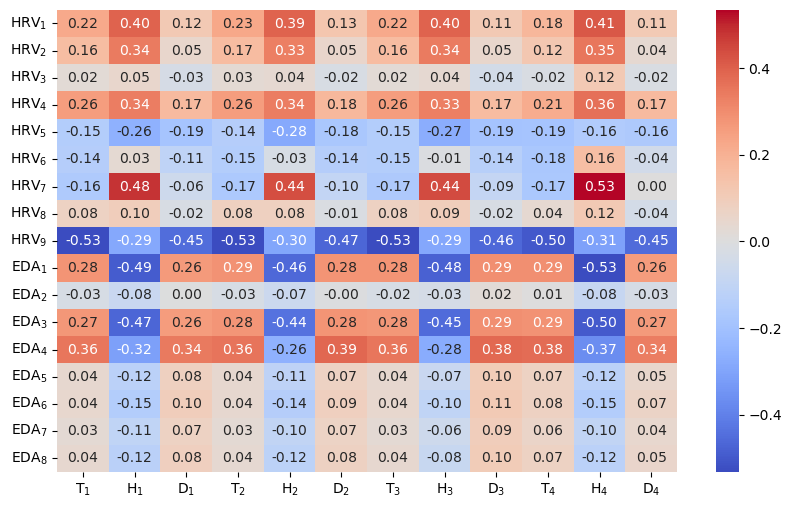

In [14]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S04')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/viz/'
plt.savefig(outpath+'S04_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S04_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


### Comfort function Implementation

In [15]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = S04_df[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: S04_df[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: S04_df[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [S04_df['Temp(C)_N1'].quantile(0.30), S04_df['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [S04_df['RH(%)_N1'].quantile(0.30), S04_df['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return 0.5  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
S04_df['lambda'] = S04_df.apply(comfort_label, axis=1)
label_counts = S04_df['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)

print("saving data files as pkl")
savepath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/final_data/data_S04.pkl'
S04_df.to_pickle(savepath)

Variables considered for the comfort function:
HRV Variable: hrv_entropy
EDA Variable: eda_tonic_mean
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
0.0    51.231763
0.5    45.969864
1.0     2.798374
Name: proportion, dtype: float64
saving data files as pkl


C:\Users\Tomar\AppData\Local\Temp\ipykernel_33772\2499146851.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S04_df['lambda'] = S04_df.apply(comfort_label, axis=1)


In [16]:
# Group by unique instances
instance_groups = S04_df.groupby('ID_instance')

# Calculate the level of comfort for each instance
comfort_levels = instance_groups['lambda'].mean()  # You can also use .median() or .mode() depending on your preference

# Print the comfort levels
print(comfort_levels)


ID_instance
S04_1    0.000000
S04_2    0.187019
S04_3    0.000000
S04_4    0.452941
S04_5    0.578735
Name: lambda, dtype: float64


### Weather Station Data (During Commuting):

In [17]:
import pandas as pd

# Load the weather data from the uploaded Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
weather_data = pd.read_excel(file_path)

# Display the first few rows of the weather data to understand its structure
weather_data.head()


,Data,Relative Humidity Min (%),Relative Humidity Ave (%),Relative Humidity Max (%),Relative Humidity StDev (%),Air Temperature Min ('C),Air Temperature Ave ('C),Air Temperature Max ('C),Air Temperature StDev ('C),Solar Radiation Min (W/m2),...,Wind direction PrevDir (>),Wind direction RisDir (>),Wind direction RisVel (m/s),Wind direction StdDevDir (>),Wind direction CalmPerc (%),Wind speed Min (m/s),Wind speed Ave (m/s),Wind speed Max (m/s),Wind speed StDev (m/s),Rainfall Tot (mm)
0,2023-07-01 00:00:00,99.40,99.41,99.42,0.0,15.50,15.60,15.69,0.0,0.0,...,298,290,1.0,53,6,0.0,1.3,3.0,0.6,0.0
1,2023-07-01 00:10:00,99.40,99.41,99.41,0.0,15.55,15.65,15.74,0.0,0.0,...,165,155,0.5,69,25,0.0,0.8,1.9,0.5,0.2
2,2023-07-01 00:20:00,99.40,99.41,99.42,0.0,15.60,15.67,15.74,0.0,0.0,...,296,296,0.8,29,29,0.0,0.7,1.5,0.5,0.0
3,2023-07-01 00:30:00,99.40,99.41,99.42,0.0,15.55,15.64,15.75,0.0,0.0,...,333,336,0.6,69,17,0.0,0.8,2.6,0.6,0.0
4,2023-07-01 00:40:00,99.39,99.40,99.40,0.0,15.46,15.51,15.58,0.0,0.0,...,327,324,1.6,20,3,0.0,1.6,2.6,0.6,0.0


In [19]:
# Define the commuting instance data
commuting_data = [
    {"ID_instance": "S04_1", "Start Time" : "2023-07-18 16:43:11", "End Time": "2023-07-18 16:48:21"},
    {"ID_instance": "S04_2", "Start Time" : "2023-07-22 06:51:50", "End Time": "2023-07-22 07:22:07"},
    {"ID_instance": "S04_3", "Start Time" : "2023-07-24 12:40:35", "End Time": "2023-07-24 12:51:03"},
    {"ID_instance": "S04_4", "Start Time" : "2023-07-26 06:33:50", "End Time": "2023-07-26 06:45:09"},
    {"ID_instance": "S04_5", "Start Time" : "2023-07-31 11:37:32", "End Time": "2023-07-31 11:49:54"}
    
]

# Convert the commuting instance data to a DataFrame
commuting_df = pd.DataFrame(commuting_data)

# Convert the Start Time and End Time columns to datetime
commuting_df['Start Time'] = pd.to_datetime(commuting_df['Start Time'])
commuting_df['End Time'] = pd.to_datetime(commuting_df['End Time'])

# Display the commuting instance DataFrame
commuting_df.head()


,ID_instance,Start Time,End Time
0,S04_1,2023-07-18 16:43:11,2023-07-18 16:48:21
1,S04_2,2023-07-22 06:51:50,2023-07-22 07:22:07
2,S04_3,2023-07-24 12:40:35,2023-07-24 12:51:03
3,S04_4,2023-07-26 06:33:50,2023-07-26 06:45:09
4,S04_5,2023-07-31 11:37:32,2023-07-31 11:49:54


In [20]:
# Convert the Data column in weather data to datetime
weather_data['Data'] = pd.to_datetime(weather_data['Data'])

# Initialize an empty list to store the results
results = []

# Iterate over each commuting instance
for _, row in commuting_df.iterrows():
    # Filter the weather data within the date-time range of the commuting instance
    mask = (weather_data['Data'] >= row['Start Time']) & (weather_data['Data'] <= row['End Time'])
    filtered_data = weather_data[mask]
    
    # Calculate the average, min, and max for Air Temperature and Relative Humidity 
    min_temp = filtered_data['Air Temperature Min (\'C)'].min()
    max_temp = filtered_data['Air Temperature Max (\'C)'].max()
    avg_temp = filtered_data['Air Temperature Ave (\'C)'].mean()

    min_rh = filtered_data['Relative Humidity Min (%)'].min()
    max_rh = filtered_data['Relative Humidity Max (%)'].max()
    avg_rh = filtered_data['Relative Humidity Ave (%)'].mean()
    
    # min_sr = filtered_data['Solar Radiation Ave (W/m2)'].min()
    # max_sr = filtered_data['Solar Radiation Ave (W/m2)'].max()
    avg_sr = filtered_data['Solar Radiation Ave (W/m2)'].mean()

    # Append the results
    results.append({
        'ID_instance': row['ID_instance'],
        'Min_Air_Temperature': min_temp,
        'Max_Air_Temperature': max_temp,
        'Avg_Air_Temperature': avg_temp,
        'Min_Relative_Humidity': min_rh,
        'Max_Relative_Humidity': max_rh,
        'Avg_Relative_Humidity': avg_rh,
        'Avg_Solar_Radiation': avg_sr
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,ID_instance,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,S04_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S04_2,24.16,24.43,24.296667,94.38,96.07,95.226667,82.673333
2,S04_3,33.02,33.40,33.240000,32.16,33.50,32.780000,931.530000
3,S04_4,15.83,16.70,16.220000,67.38,71.74,69.900000,49.460000
4,S04_5,28.02,29.50,28.730000,34.02,36.60,35.570000,662.990000


### Weather Station Data (Day of Commuting from 8am to 6pm):

In [1]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Data' column to datetime format
data['Data'] = pd.to_datetime(data['Data'])

# Define the date ranges as given in the task
date_ranges = [
    ("2023-07-18 08:00:00", "2023-07-18 18:00:00"),
    ("2023-07-22 08:00:00", "2023-07-22 18:00:00"),
    ("2023-07-24 08:00:00", "2023-07-24 18:00:00"),
    ("2023-07-26 08:00:00", "2023-07-26 18:00:00"),
    ("2023-07-31 08:00:00", "2023-07-31 18:00:00")

]

# Initialize a list to store statistics for each day
daily_statistics = []

# Calculate statistics for each date range
for start, end in date_ranges:
    day_data = data[(data['Data'] >= start) & (data['Data'] <= end)]
    
    stats = {
        'Date Range': f'{start} to {end}',
        'Min_Air_Temperature': day_data["Air Temperature Min ('C)"].min(),
        'Max_Air_Temperature': day_data["Air Temperature Max ('C)"].max(),
        'Avg_Air_Temperature': day_data["Air Temperature Ave ('C)"].mean(),
        'Min_Relative_Humidity': day_data['Relative Humidity Min (%)'].min(),
        'Max_Relative_Humidity': day_data['Relative Humidity Max (%)'].max(),
        'Avg_Relative_Humidity': day_data['Relative Humidity Ave (%)'].mean(),
        'Avg_Solar_Radiation': day_data['Solar Radiation Ave (W/m2)'].mean()
    }
    
    daily_statistics.append(stats)

# Convert the results to a DataFrame for better readability
daily_statistics_df = pd.DataFrame(daily_statistics)
daily_statistics_df


,Date Range,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,2023-07-18 08:00:00 to 2023-07-18 18:00:00,26.27,37.02,33.207377,23.80,60.80,34.469016,770.390000
1,2023-07-22 08:00:00 to 2023-07-22 18:00:00,24.64,34.78,31.060164,24.22,93.24,42.282623,731.931311
2,2023-07-24 08:00:00 to 2023-07-24 18:00:00,25.08,36.17,32.127541,24.29,73.00,40.581148,652.817213
3,2023-07-26 08:00:00 to 2023-07-26 18:00:00,19.55,28.26,24.287049,31.59,59.77,44.858197,594.116885
4,2023-07-31 08:00:00 to 2023-07-31 18:00:00,21.59,32.85,28.886557,25.55,59.83,36.206393,710.517049


### Living Lab (Day of Commuting from 8am to 6pm):

In [24]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_d.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day 8AM to 6PM
time_intervals = [
    ("2023-07-18 08:00:00", "2023-07-18 18:00:00"),
    ("2023-07-22 08:00:00", "2023-07-22 18:00:00"),
    ("2023-07-24 08:00:00", "2023-07-24 18:00:00"),
    ("2023-07-26 08:00:00", "2023-07-26 18:00:00"),
    ("2023-07-31 08:00:00", "2023-07-31 18:00:00")   
]

# ## Define the Times one hour before entering the LL
# time_intervals = [
#     ("2023-07-18 16:43:11", "2023-07-18 16:48:21"),
#     ("2023-07-22 06:51:50", "2023-07-22 07:22:07"),
#     ("2023-07-24 12:40:35", "2023-07-24 12:51:03"),
#     ("2023-07-26 06:33:50", "2023-07-26 06:45:09"),
#     ("2023-07-31 11:37:32", "2023-07-31 11:49:54")
# ]

# ## Define the Times one hour after entering the LL
# time_intervals = [
#     ("2023-07-18 16:43:11", "2023-07-18 16:48:21"),
#     ("2023-07-22 06:51:50", "2023-07-22 07:22:07"),
#     ("2023-07-24 12:40:35", "2023-07-24 12:51:03"),
#     ("2023-07-26 06:33:50", "2023-07-26 06:45:09"),
#     ("2023-07-31 11:37:32", "2023-07-31 11:49:54")
# ]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Min_Temp_Globe,Max_Temp_Globe,Avg_Temp_Globe,Min_Relative_Humidity,Max_Relative_Humidity,Mean_Relative_Humidity,Illu_min,Illu_max,Illu_avg,Ele1_sum,Ele2_sum,Window_open_percentage,Door_open_percentage
0,2023-07-18 08:00:00,2023-07-18 18:00:00,26.272461,32.085205,28.386361,950.003174,950.003174,950.003174,44.190796,55.350704,48.401955,59.294891,355.975708,179.025047,5.484489,35.209287,38.333333,34.166667
1,2023-07-22 08:00:00,2023-07-22 18:00:00,30.177490,33.680664,31.297007,950.003174,950.003174,950.003174,34.944534,58.197021,43.339422,63.085747,398.019775,171.244958,5.242671,5.527219,100.000000,0.000000
2,2023-07-24 08:00:00,2023-07-24 18:00:00,29.268799,35.549561,32.139734,950.003174,950.003174,950.003174,29.153070,53.205643,43.493622,24.024391,687.668030,238.224711,5.395237,42.891855,74.166667,70.000000
3,2023-07-26 08:00:00,2023-07-26 18:00:00,24.286865,26.944092,25.602730,950.003174,950.003174,950.003174,37.453468,48.013878,43.347246,112.606621,660.010742,297.984706,5.776158,34.779252,100.000000,30.000000
4,2023-07-31 08:00:00,2023-07-31 18:00:00,24.658936,29.168457,26.600663,950.003174,950.003174,950.003174,37.644615,51.079922,44.887912,63.443947,355.193909,168.803239,5.407323,53.277520,94.166667,85.833333


# Living Lab (Before arrivel and after arrivel)

In [3]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_d.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times 
time_intervals = [
    ("2023-07-18 16:43:11", "2023-07-18 16:48:21"),
    ("2023-07-22 06:51:50", "2023-07-22 07:22:07"),
    ("2023-07-24 12:40:35", "2023-07-24 12:51:03"),
    ("2023-07-26 06:33:50", "2023-07-26 06:45:09"),
    ("2023-07-31 11:37:32", "2023-07-31 11:49:54")
    
]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Min_Temp_Globe,Max_Temp_Globe,Avg_Temp_Globe,Min_Relative_Humidity,Max_Relative_Humidity,Mean_Relative_Humidity,Illu_min,Illu_max,Illu_avg,Ele1_sum,Ele2_sum,Window_open_%,Door_open_%
0,2023-07-18 16:43:11,2023-07-18 16:48:21,29.843506,29.880127,29.861817,950.003174,950.003174,950.003174,45.263031,45.276573,45.269802,332.748779,334.135254,333.442017,0.091182,0.298799,0.0,100.0
1,2023-07-22 06:51:50,2023-07-22 07:22:07,30.354248,30.425537,30.384928,950.003174,950.003174,950.003174,57.034264,57.515106,57.251609,45.842743,65.029526,57.048925,0.251986,0.342584,100.0,0.0
2,2023-07-24 12:40:35,2023-07-24 12:51:03,31.396484,31.412842,31.404663,950.003174,950.003174,950.003174,45.529358,45.553856,45.541607,147.220795,174.015625,160.618210,0.090591,0.094225,0.0,0.0
3,2023-07-26 06:33:50,2023-07-26 06:45:09,24.636963,24.817383,24.727173,950.003174,950.003174,950.003174,40.363522,40.461227,40.412374,56.888771,587.675659,322.282215,0.093013,0.095078,100.0,50.0
4,2023-07-31 11:37:32,2023-07-31 11:49:54,25.894775,25.939941,25.919922,950.003174,950.003174,950.003174,47.396172,48.402824,47.802133,67.568779,98.758316,84.043630,0.216769,1.920084,100.0,100.0


In [4]:
import pandas as pd
from datetime import datetime, timedelta

# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_d.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": " S04_1", "Start Time": "2023-07-18 16:43:11", "End Time": "2023-07-18 16:48:21"},
    {"ID_instance": " S04_2", "Start Time": "2023-07-22 06:51:50", "End Time": "2023-07-22 07:22:07"},
    {"ID_instance": " S04_3", "Start Time": "2023-07-24 12:40:35", "End Time": "2023-07-24 12:51:03"},
    {"ID_instance": " S04_4", "Start Time": "2023-07-26 06:33:50", "End Time": "2023-07-26 06:45:09"},
    {"ID_instance": " S04_5", "Start Time": "2023-07-31 11:37:32", "End Time": "2023-07-31 11:49:54"}
   
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Initialize lists to store results
before_results_list = []
after_results_list = []

# Process each commuting instance
for instance in commuting_instances:
    start_time = instance["Start Time"]
    end_time = instance["End Time"]
    one_hour_before = start_time - timedelta(hours=1)
    one_hour_after = end_time + timedelta(hours=1)
    
    # Filter data for one hour before the start time
    before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
    
    # Calculate required metrics for before one hour
    before_result = {
        'ID_instance': instance["ID_instance"],
        'Interval': 'Before',
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the before results list
    before_results_list.append(before_result)
    
    # Filter data for one hour after the end time
    after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]
    
    # Calculate required metrics for after one hour
    after_result = {
        'ID_instance': instance["ID_instance"],
        'Interval': 'After',
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the after results list
    after_results_list.append(after_result)

# Create DataFrames from the results lists
before_results_df = pd.DataFrame(before_results_list)
after_results_df = pd.DataFrame(after_results_list)


before_results_df, after_results_df


(  ID_instance Interval          Start_Time            End_Time  Min_Temp_Air  \
 0       S04_1   Before 2023-07-31 11:37:32 2023-07-31 11:49:54     25.894775   
 1       S04_2   Before 2023-07-31 11:37:32 2023-07-31 11:49:54     25.894775   
 2       S04_3   Before 2023-07-31 11:37:32 2023-07-31 11:49:54     25.894775   
 3       S04_4   Before 2023-07-31 11:37:32 2023-07-31 11:49:54     25.894775   
 4       S04_5   Before 2023-07-31 11:37:32 2023-07-31 11:49:54     25.894775   
 
    Max_Temp_Air  Avg_Temp_Air  Min_Temp_Globe  Max_Temp_Globe  Avg_Temp_Globe  \
 0     25.939941     25.919922      950.003174      950.003174      950.003174   
 1     25.939941     25.919922      950.003174      950.003174      950.003174   
 2     25.939941     25.919922      950.003174      950.003174      950.003174   
 3     25.939941     25.919922      950.003174      950.003174      950.003174   
 4     25.939941     25.919922      950.003174      950.003174      950.003174   
 
    Min_Relative_H

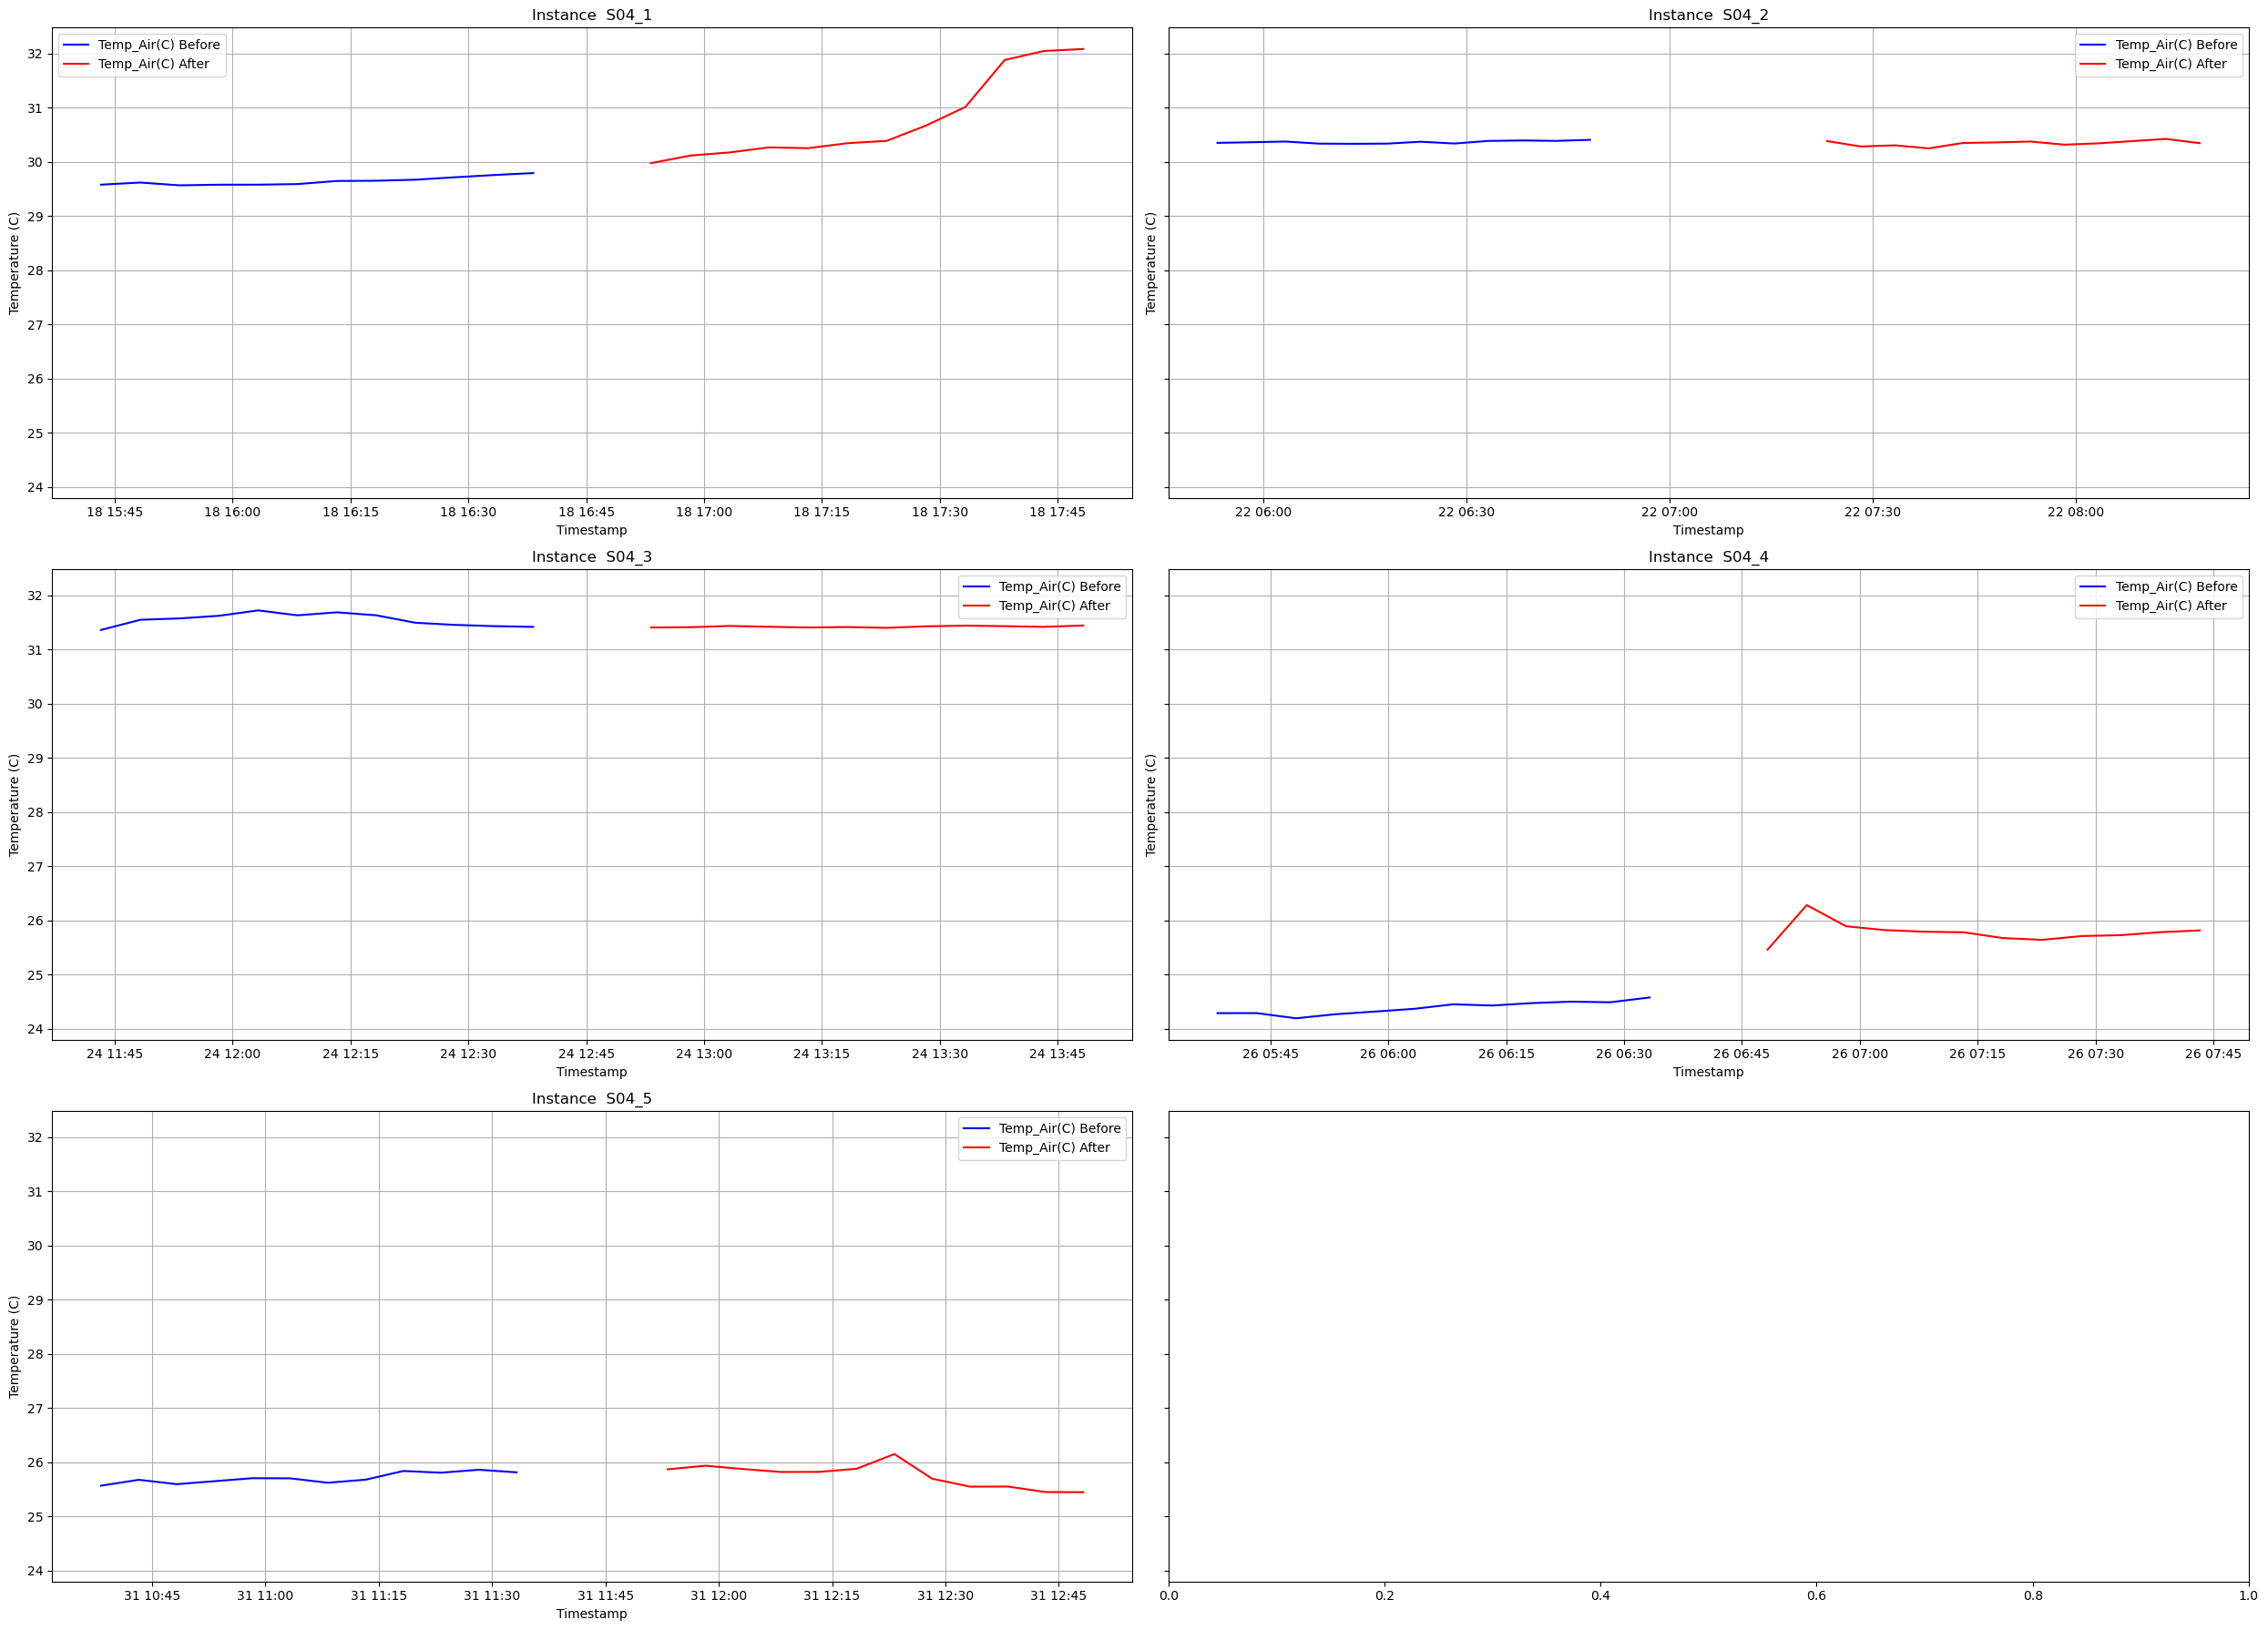

In [5]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_d.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
     {"ID_instance": " S04_1", "Start Time": "2023-07-18 16:43:11", "End Time": "2023-07-18 16:48:21"},
     {"ID_instance": " S04_2", "Start Time": "2023-07-22 06:51:50", "End Time": "2023-07-22 07:22:07"},
     {"ID_instance": " S04_3", "Start Time": "2023-07-24 12:40:35", "End Time": "2023-07-24 12:51:03"},
     {"ID_instance": " S04_4", "Start Time": "2023-07-26 06:33:50", "End Time": "2023-07-26 06:45:09"},
     {"ID_instance": " S04_5", "Start Time": "2023-07-31 11:37:32", "End Time": "2023-07-31 11:49:54"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before and after for each instance, creating a subplot matrix
def plot_temperatures_before_after(commuting_instances, data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data['Timestamp'], before_data['Temp_Air(C)_x'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data['Timestamp'], after_data['Temp_Air(C)_x'], label='Temp_Air(C) After', color='red')
        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance
plot_temperatures_before_after(commuting_instances, data)


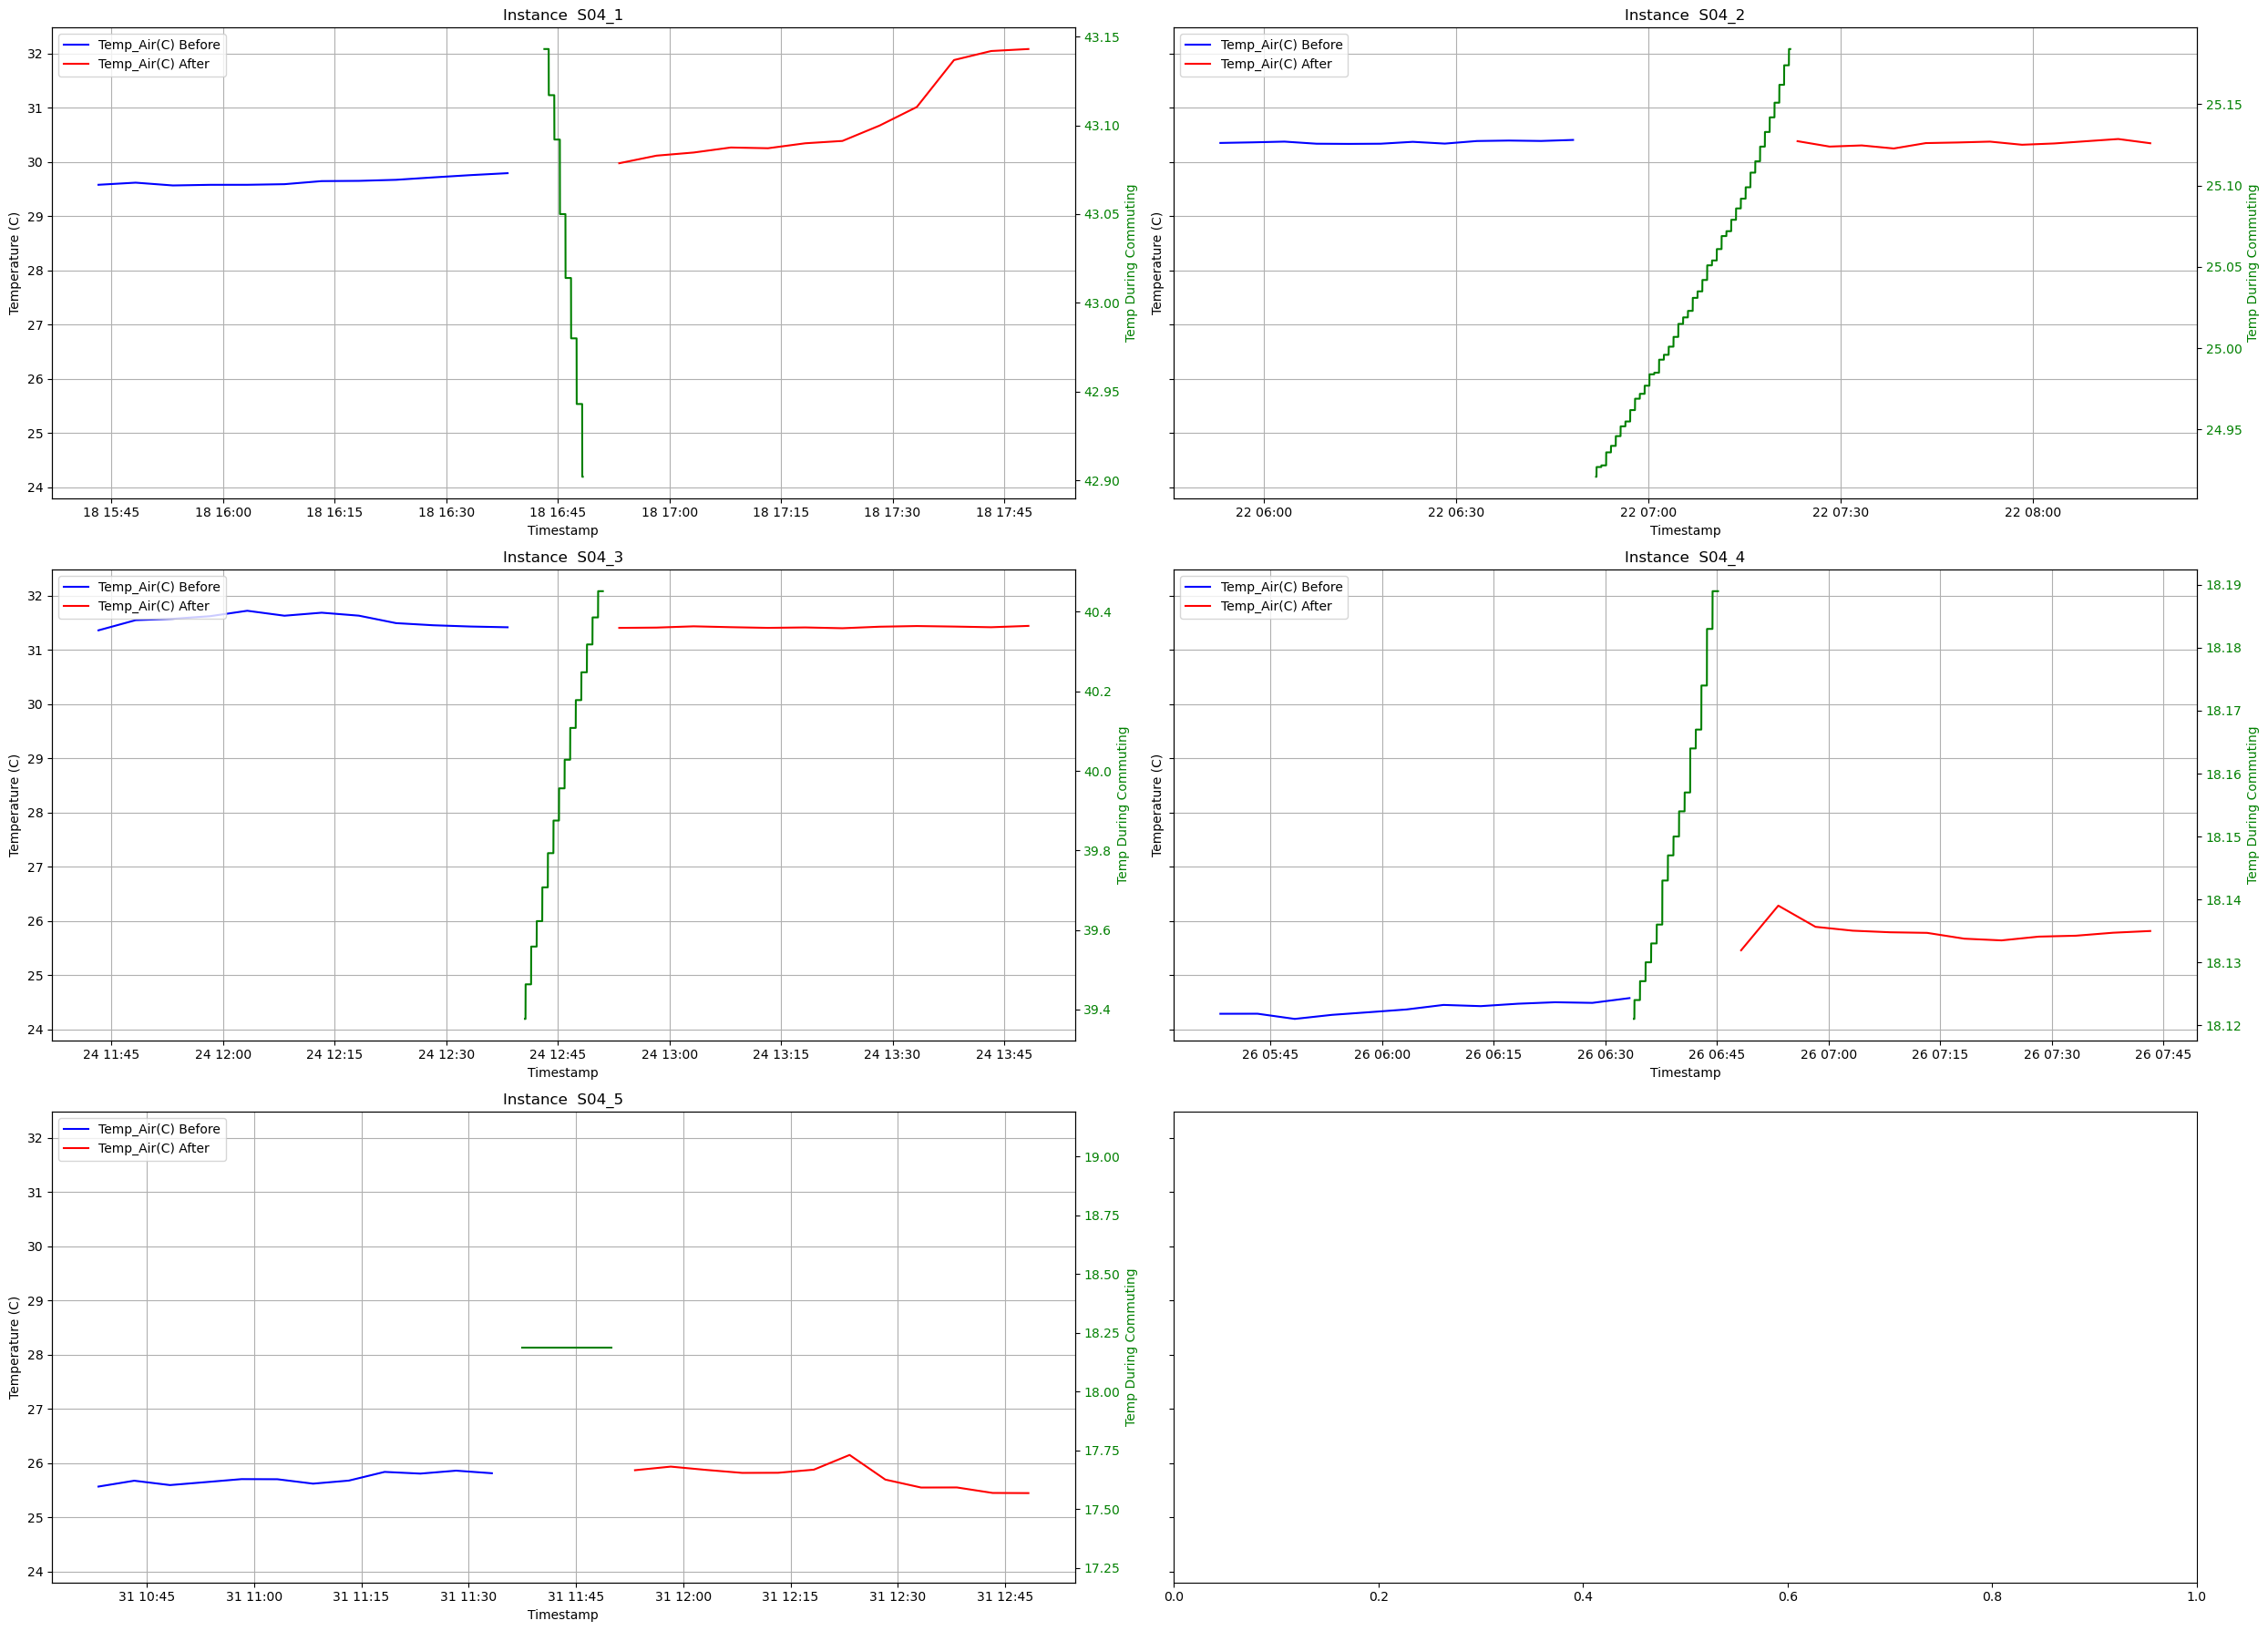

In [11]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_d.csv'

data = pd.read_csv(data_file_path)
commuting_data = S04_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
        {"ID_instance": " S04_1", "Start Time": "2023-07-18 16:43:11", "End Time": "2023-07-18 16:48:21"},
        {"ID_instance": " S04_2", "Start Time": "2023-07-22 06:51:50", "End Time": "2023-07-22 07:22:07"},
        {"ID_instance": " S04_3", "Start Time": "2023-07-24 12:40:35", "End Time": "2023-07-24 12:51:03"},
        {"ID_instance": " S04_4", "Start Time": "2023-07-26 06:33:50", "End Time": "2023-07-26 06:45:09"},
        {"ID_instance": " S04_5", "Start Time": "2023-07-31 11:37:32", "End Time": "2023-07-31 11:49:54"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before, during, and after for each instance, creating a subplot matrix
def plot_temperatures_full(commuting_instances, data, commuting_data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data['Timestamp'], before_data['Temp_Air(C)_x'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data['Timestamp'], after_data['Temp_Air(C)_x'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data['Timestamp'], during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)
